# BoomBikes_Linear_Regression

## Step-1: Data readiblity/Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [3]:
bike = pd.read_csv("C:\\Users\\Dixith\\OneDrive\\Desktop\\Top Mentor\\Top Mentor Batch-58\\BikeSharing Case Study\\BikeSharing Case Study\\Assignment Linear Regression\\day.csv")

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking missing value:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Insights

we don't have missing values in dataset.

### Rename the columns name:

In [9]:
# use '.rename' function:
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Mapping Variables for season, month, weathersit,weekday

In [10]:
# as in these coloums dtype is int, convert it into string form:
# for that will use 'mapping':
bike['season'] = bike.season.map({1:'spring',
                                 2:'summer',
                                 3:'fall',
                                 4:'winter'})
bike['month'] = bike.month.map({1:'Jan', 2:'Feb', 3:'March', 4:'April',
                                 5:'May', 6:'June', 7:'July', 8:'Aug',
                                 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike['weathersit'] = bike.weathersit.map({1:'Clear', 2:'Mist + Cloudy',
                                         3:'light_snow', 4:'Snow + fog'})
bike['weekday'] = bike.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday',
                                   3:'Wednesday', 4:'Thursday',
                                   5:'Friday', 6:'Saturday'})
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step-2: Data Visualisations:

In [11]:
# check unique values:
# use 'nunique' nd for srting : use '.sort_values()' function:
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

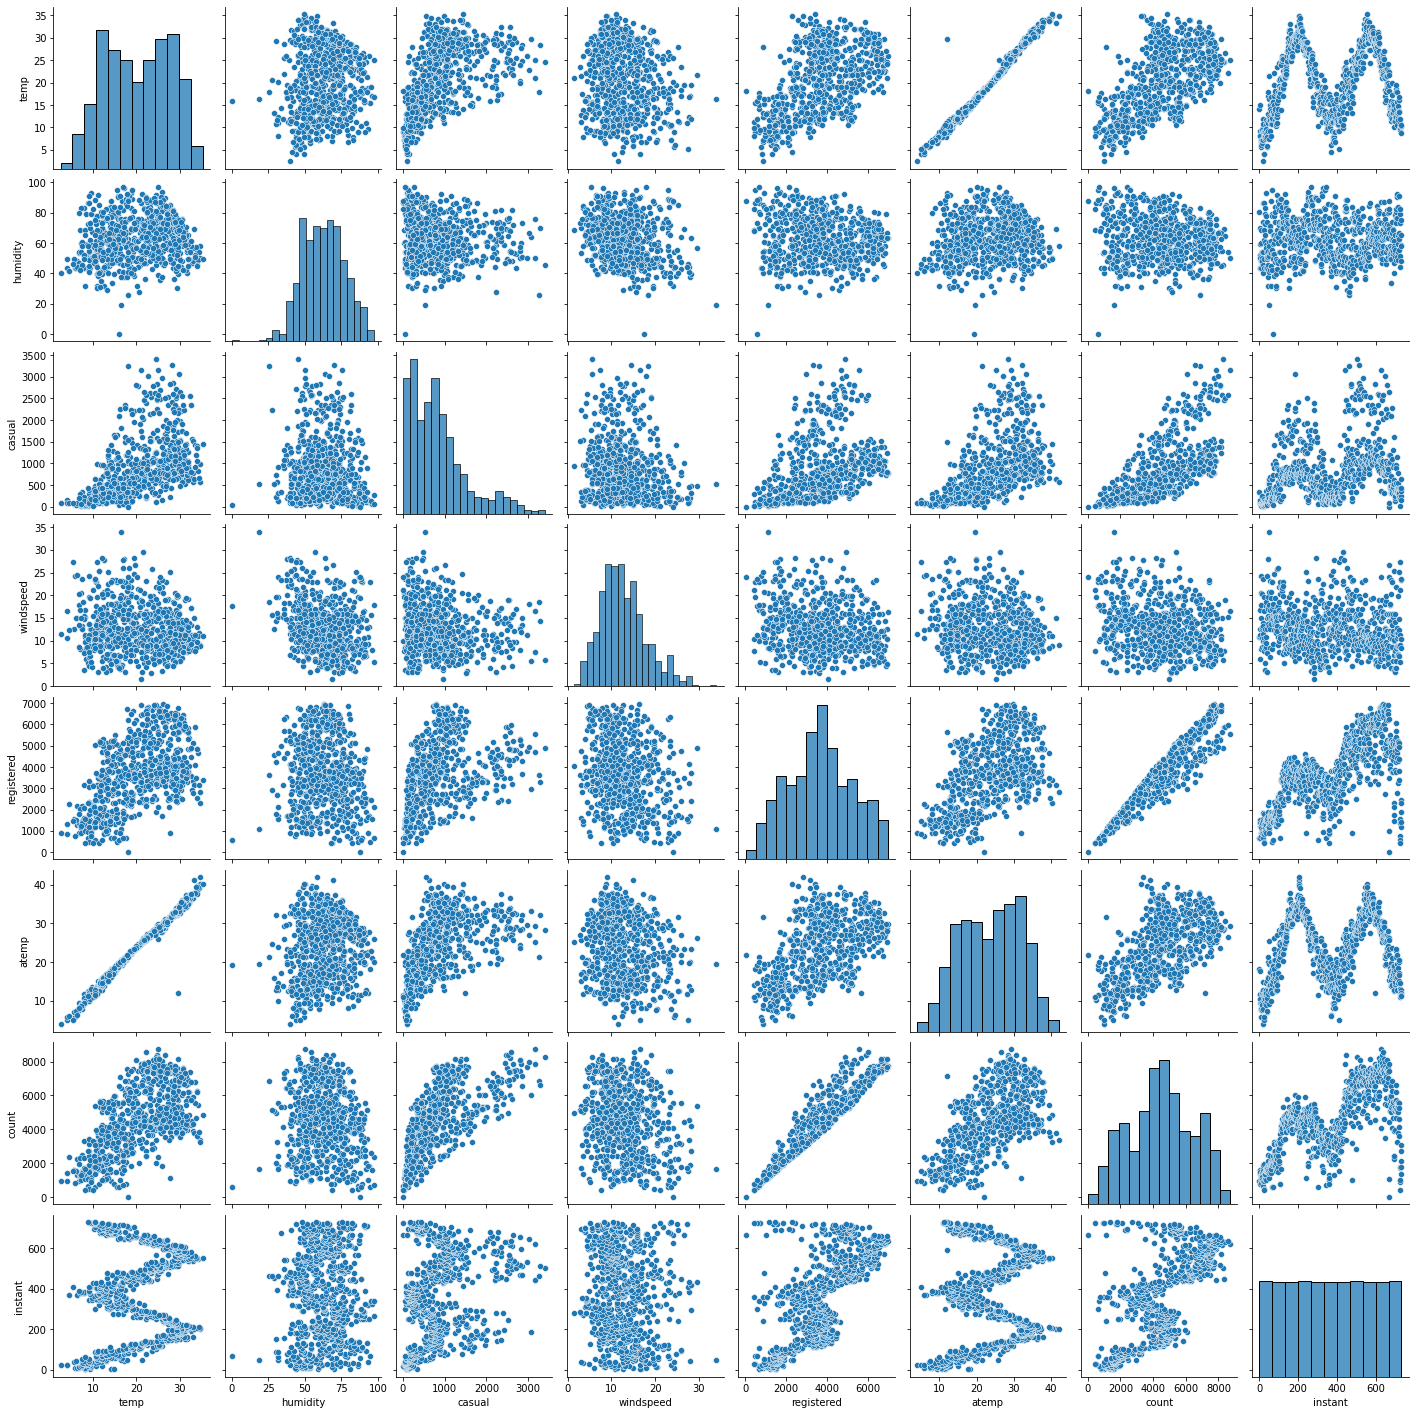

In [12]:
# will use 'Pairplot':
sns.pairplot(bike, vars=['temp', 'humidity', 'casual','windspeed','registered',
                          'atemp','count','instant'])
plt.show()

### Insights:

as, we can see in the plots, Bike rentals are more correlated to temperature.

### Now, Categorical Variables:

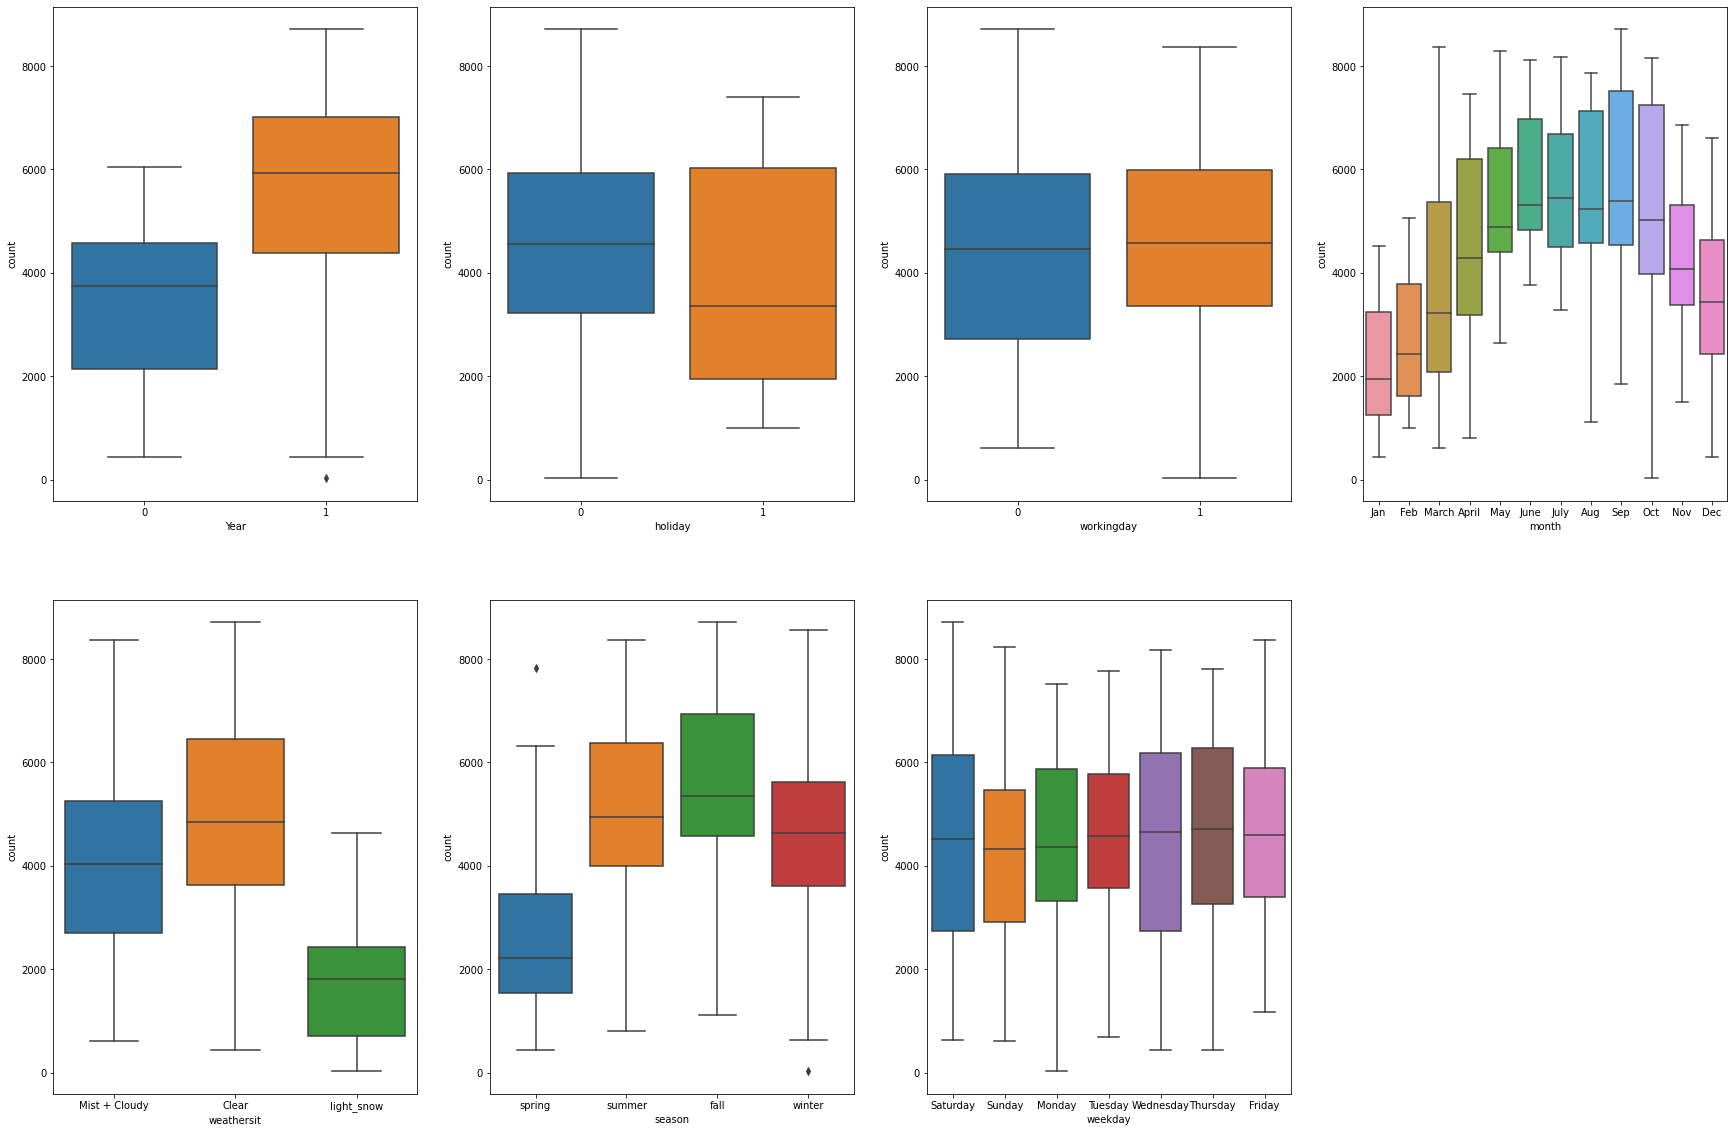

In [13]:
# for categorical variable will try to use 'boxplot':
# as we are using multiple variable will use 'subplot'

plt.figure(figsize=(30, 20))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.show()

### Insights:

1. bike counts are higher in the year 2019 compared to 2018.
2. as per plot of weekday, rental are higher on wednesday, thursday and saturday.
3. bike counts are more during fall season and summer.
4. counts are much more higher when weather is clear.

insights shows the relationship between categorical variable and a Target variable.

### Univariate Analysis (barplot)

### 1: Year

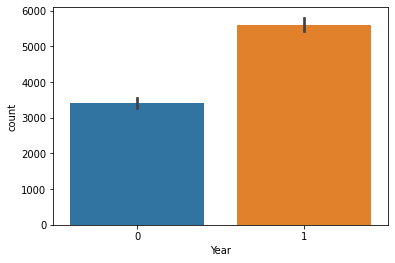

In [14]:
# bike rental count in 2018 and 2019 :
sns.barplot(x='Year', y='count', data=bike)
plt.show()

### Insights:

as per plot in 2019 bike counts are higher than 2018.

### Months:

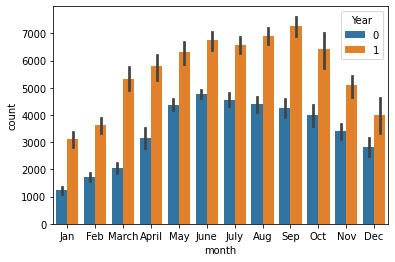

In [15]:
# relation between months and years:
sns.barplot(x='month', y='count', hue='Year', data=bike)
plt.show()

### Insights:

so here, in the month of sep, 2019 bike counts are higher.

or we can say that in the year 2019 counts are higher compared to 2018.

### Season

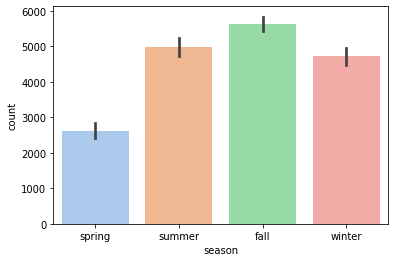

In [16]:
# Relation between seasons:
sns.barplot(x='season', y='count', data=bike, palette="pastel")
plt.show()

### insights:

during fall season counts of bike are high.

### Weathersit

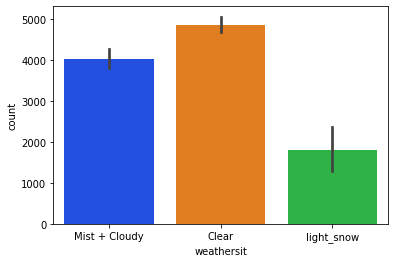

In [17]:
sns.barplot(x='weathersit', y='count', data=bike, palette="bright")
plt.show()

### Insights:

counts are high when weather is clear.

### Univariate Analysis(Scatter Plot)

### Temperature:

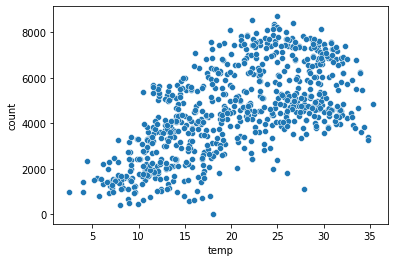

In [18]:
# for temperature will use 'Scatter plot':
sns.scatterplot(x='temp', y= 'count', data=bike)
plt.show()

### Insights:

Count of bike is higher when temperature is mostly between 20 to 35 deg. cel. 

means bike counts are high when weather is clear.

### Humidity:

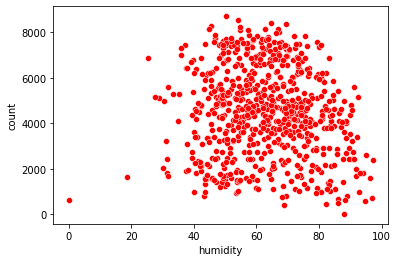

In [19]:
sns.scatterplot(x='humidity', y= 'count', data=bike, color="red")
plt.show()

when humidity is between 60% to 100% people prefer bikes more.

### Heatmap:

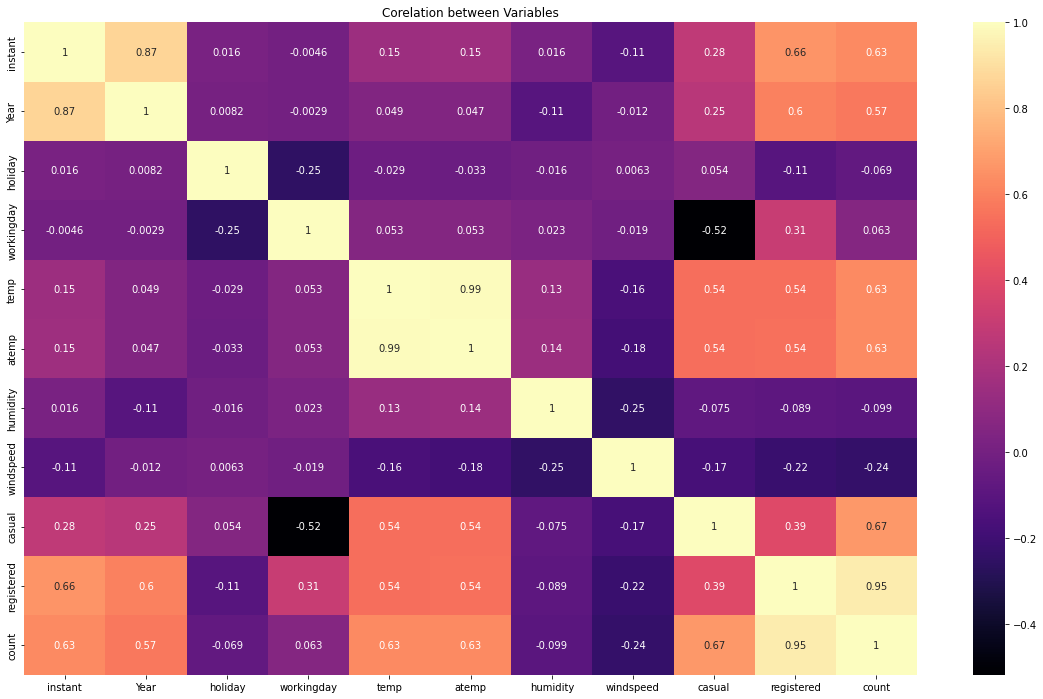

In [20]:
# now check corelations between variables:
plt.figure(figsize=(20,12))
sns.heatmap(bike.corr(), cmap = 'magma', annot = True)
plt.title("Corelation between Variables")
plt.show()

### Insights:

as we can see,temp, atemp, casual, instant variables are corelated to count.

here,temp is highly corelation with count.

### Data Cleanning:

here,many colums are unnecessary,

so, will drop it.

In [21]:
# check dataframe first:
bike.head(3)

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [22]:
# here, instant,dteday,atemp,casual,registered columns are unnecessary,
# will drop it:
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
# check datatype:
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## Step-3: Data Preparation

Create Dummy dataset for season, months, weekday, weathersit as their data type is 'object':

In [24]:
# for dummy data use 'pd.get_dummies' function:

months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [25]:
# now concat the results in the original dataframe:
# use 'pd.concat' function:

bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [26]:
# checking all columns name:
bike.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov',
       'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Mist + Cloudy', 'light_snow', 'spring', 'summer',
       'winter', 'season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [27]:
# drop season, month, weekday, weathersit columns:

bike.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)
bike.head(3)

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349


In [28]:
# checking columns name again:
bike.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov',
       'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Mist + Cloudy', 'light_snow', 'spring', 'summer',
       'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [29]:
# check no. of rows and columns:
bike.shape

(730, 29)

after Cleanning the data check again correlation between variables.

again will use 'heatmap'

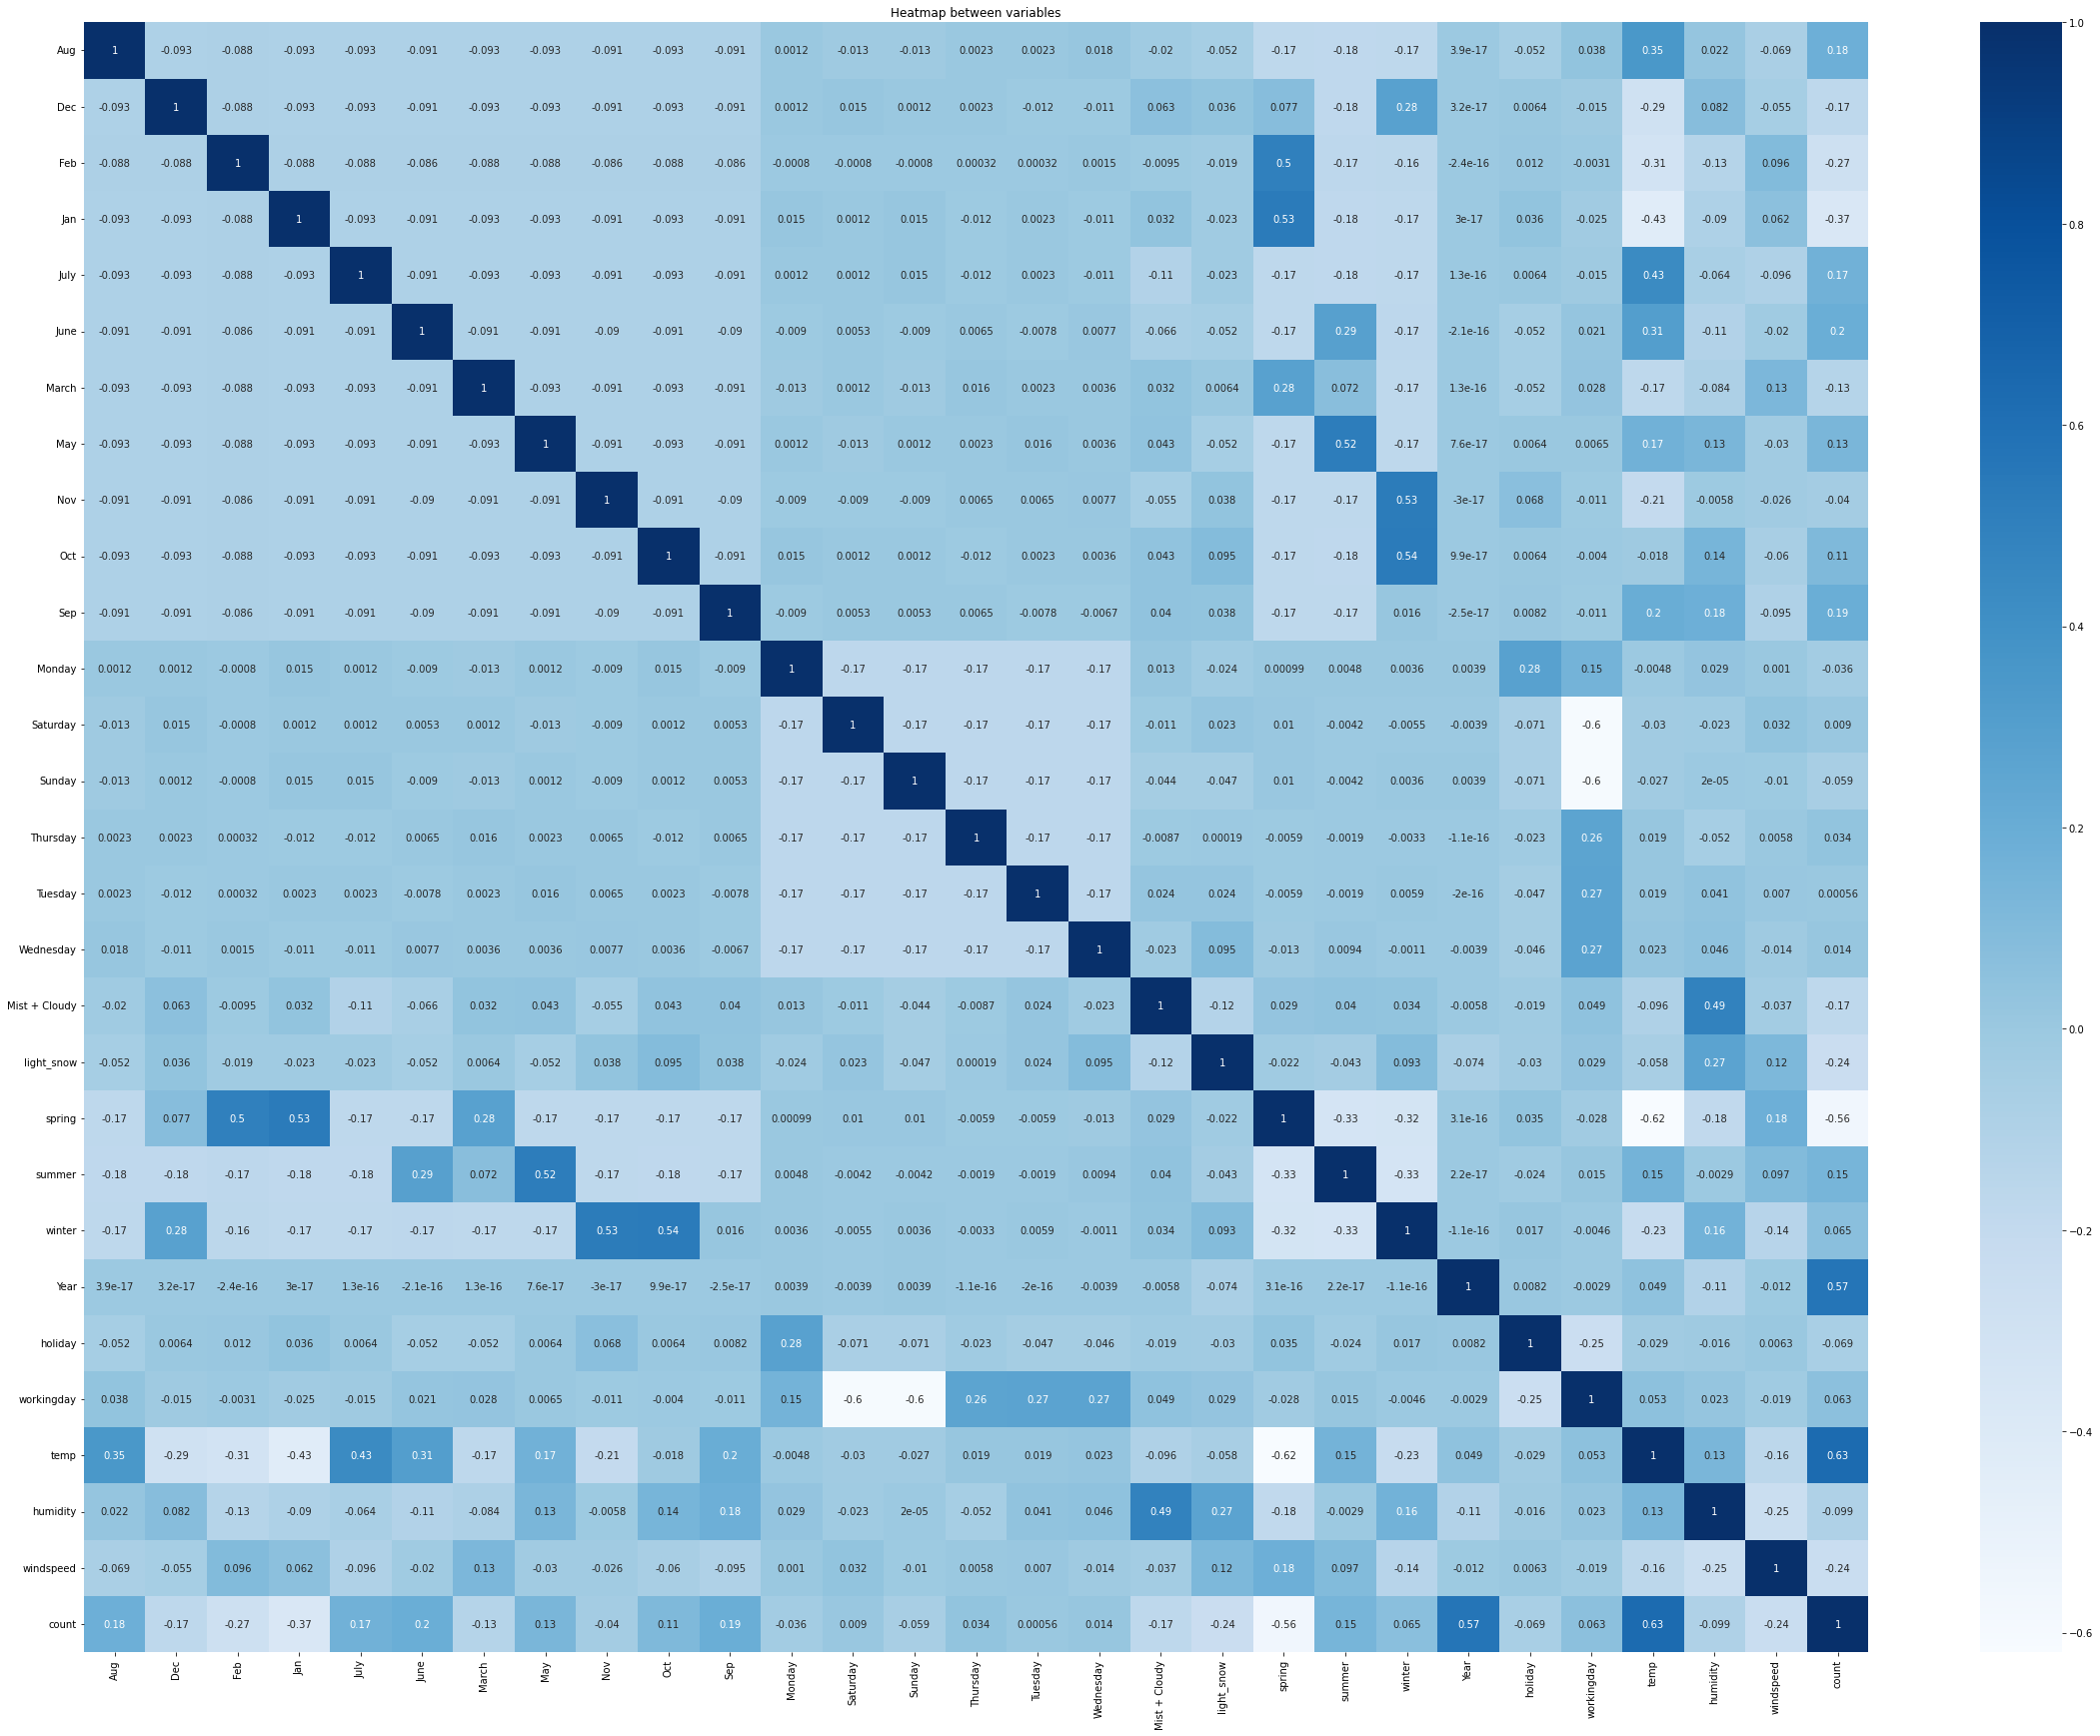

In [30]:
plt.figure(figsize=(40,30))
sns.heatmap(bike.corr(), cmap = 'Blues', annot = True)
plt.title("Heatmap between variables")
plt.show()

### Insights:

in months: June to October, Summer season are in good corelation with the 'count'.
    
    That means in Summer season and Between june to October when weather is clear or mist-cloudy people are prefering to rental bikes.

## Step-4: Splitting the data into 'Training' and 'Testing':

In ML we will split the dataset in to 70-30% ration.

70% data for Training and 30% dataset for Testing purpose. for that will use 'sklearn'

In [31]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dixith\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [32]:
# import 'sklearn':

from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)

In [33]:
# rows and columns size after spliting into train and test data:

print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features:

There are 2 common ways for rescaling:
    
    1. Min-Max scaling called "Normalisation": Between 0 and 1.
        
    2. standardisation: mean: 0, sigma: 1.

### Normalisation: Min-max Scaling

In [34]:
# import library:
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Instantiate an Object:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [36]:
# checking numeric variables (min & max) after scaling:
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


here, all the numeric values are mapped between 0 to 1.

'Multicollinearity': Predictors are not related with each others, if there is corelation among the predictors.

### checking correlation between variables after rescaling:

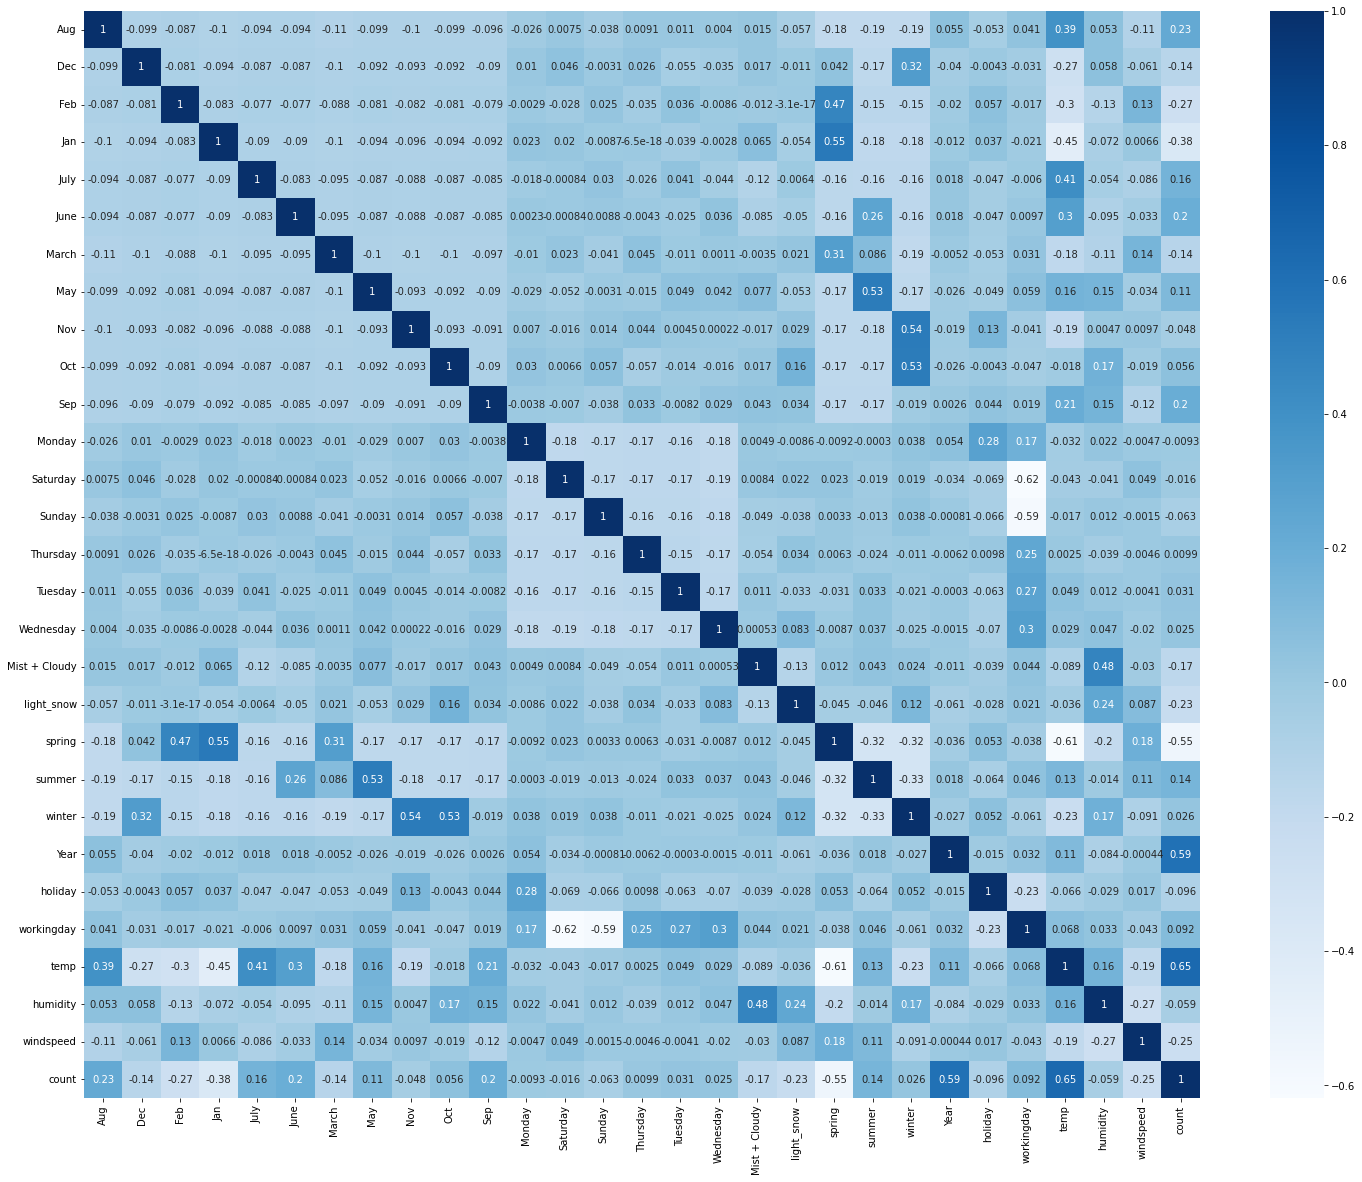

In [37]:
# little to no multicolinearity among predictors:

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='Blues',annot = True)
plt.show()

looking from the heatmap- after scaling, temp, Year is correlated to the 'count' variable. and also in august, September months counts are little high, if we notice.

### X (independent value) & y (dependent value) sets for the model building:

In [38]:
y_train = bike_train.pop('count')
X_train = bike_train

## Step-5: Building a 'Linear Model'

will use 'LinearRegression' function from 'Scikit Learn' for its compatiblity.

### RFE:(Recursive Feature Elimination)

the 'coefficients' of a linear model, the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [39]:
# import library:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step= 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('March', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Mist + Cloudy', True, 1),
 ('light_snow', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [42]:
# columns where RFE support is True:
col = X_train.columns[rfe.support_]
col

Index(['Feb', 'Jan', 'Sep', 'Saturday', 'Sunday', 'Mist + Cloudy',
       'light_snow', 'winter', 'Year', 'holiday', 'workingday', 'temp',
       'humidity', 'windspeed'],
      dtype='object')

In [43]:
# Columns where RFE support is False:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday', 'spring', 'summer'],
      dtype='object')

### Build Model using 'statsmodel':

In [44]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dixith\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [45]:
# now create X_test dataframe with RFE selected variables:
# make a new col ' X_train_rfe':
X_train_rfe = X_train[col]

In [46]:
# adding constant variable:
# import 'statsmodels.api':

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
# run the linear model:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.5
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          6.83e-181
Time:                        10:56:24   Log-Likelihood:                 489.83
No. Observations:                 510   AIC:                            -951.7
Df Residuals:                     496   BIC:                            -892.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2131      0.025      8.500

### Insights:

here, R-squared:0.829,
    
but also giving the notes: there are strong multicollinearity problems

### Checking VIF: (Variance Inflation Factor)

It gives a basic quantitative idea about how much feature variable are correlated with each others. it is extremely important feature to test linear model.

### Formula of VIF:

### VIFi = 1/ 1-(Ri)**2

In [49]:
# Drop the constant values:

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [50]:
# Calculating VIFs for new model:

# import library for VIF:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,36.89
3,Saturday,8.99
4,Sunday,8.85
9,holiday,2.40
11,temp,2.13
12,humidity,1.87
1,Jan,1.65
5,Mist + Cloudy,1.56
7,winter,1.47
0,Feb,1.35


In [51]:
# drop January:
X_train_new1 = X_train_rfe.drop(['Jan'], axis = 1)

In [52]:
# build a model:
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train, X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     187.2
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          1.27e-175
Time:                        10:57:11   Log-Likelihood:                 474.57
No. Observations:                 510   AIC:                            -923.1
Df Residuals:                     497   BIC:                            -868.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1622      0.024      6.757

in this chart we have r-square is 0.819, and still there are problem in multicollinearity.

In [53]:
# Drop the constant term :
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [54]:
# Calculate the VIFs for the new model:
vif = pd.DataFrame()
X = X_train_new1
# adding new column called : 'Features'
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by = 'VIF', ascending = False)
vif

,Features,VIF
9,workingday,31.98
2,Saturday,7.86
3,Sunday,7.81
8,holiday,2.17
11,humidity,1.86
4,Mist + Cloudy,1.56
10,temp,1.40
5,light_snow,1.24
6,winter,1.21
0,Feb,1.17


'humidity' variable can be dropped looking from the VIF's table.

### Rebuilding the model without 'humidity':

In [55]:
# dropping 'humidity':
X_train_new2 = X_train_lm1.drop(['humidity'], axis = 1)

In [56]:
# Build a model:
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.1
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          6.66e-174
Time:                        10:57:24   Log-Likelihood:                 467.74
No. Observations:                 510   AIC:                            -911.5
Df Residuals:                     498   BIC:                            -860.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0942      0.015      6.087

In [57]:
#Drop the constant:

X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [58]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,12.46
2,Saturday,3.58
3,Sunday,3.40
8,holiday,1.42
10,temp,1.32
0,Feb,1.17
6,winter,1.16
11,windspeed,1.08
1,Sep,1.07
5,light_snow,1.05


Now, 'holiday' can be dropped as it's insignificant looking high in VIF.

### Rebuild the model without 'holiday':

In [59]:
# drop the holiday column:
X_train_new3 = X_train_lm2.drop(['holiday'], axis = 1)

In [60]:
# Add a constant variable:
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train, X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.1
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          6.66e-174
Time:                        10:57:35   Log-Likelihood:                 467.74
No. Observations:                 510   AIC:                            -911.5
Df Residuals:                     498   BIC:                            -860.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0452      0.032      1.400

In [61]:
# Drop constant variable:
X_train_lm3 = X_train_lm3.drop(['const'], axis = 1)

In [62]:
# calculate the VIF table for new model:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
8,workingday,9.24
9,temp,7.41
10,windspeed,4.35
2,Saturday,2.85
3,Sunday,2.72
7,Year,2.05
4,Mist + Cloudy,1.57
6,winter,1.43
0,Feb,1.20
1,Sep,1.16


In [63]:
# drop 'windspeed':
X_train_new4 = X_train_lm3.drop(['windspeed'], axis=1)

In [64]:
# build a model:
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train, X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.5
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          8.09e-170
Time:                        10:58:04   Log-Likelihood:                 455.30
No. Observations:                 510   AIC:                            -888.6
Df Residuals:                     499   BIC:                            -842.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0110      0.031     -0.354

July column, we should drop

In [65]:
# drop constant:
X_train_lm5 = X_train_lm4.drop(['const'], axis = 1)

In [66]:
# calculate the vifs for the new model:
vif =pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
9,temp,7.40
8,workingday,6.98
2,Saturday,2.25
3,Sunday,2.23
7,Year,2.04
4,Mist + Cloudy,1.57
6,winter,1.43
0,Feb,1.18
1,Sep,1.15
5,light_snow,1.07


### Finally VIFs and p-value both are within an acceptable range.

- The p-value for each terms test the null hypothesis that, the coefficient is equal to zero(no effect).A low p-value (<0.05) indicates that we can reject the null hypothesis.

- A thumb rule: if a VIF>10, you have high multicollinearity. In this case, we are in good shape as our VIF values are not more than 10.

- R-squared measures the strength of the relationship between model and the dependent variable on a convinient 0-100% scale. And here, R-square value is 0.805 or 80.5%.

- Adj. R-squared value is 0.801 or 80.1%.

So, we drop off January, windspeed, holiday and humidity variables from the RFE support columns.

## Step-6: Residual Analysis of the train data:

### Assumptions of Linear Regression.

In [67]:
# check last rebuiled model's dataset: which is 'lm4': 
# for X train data:
X_train_lm4

,const,Feb,Sep,Saturday,Sunday,Mist + Cloudy,light_snow,winter,Year,workingday,temp
576,1.0,0,0,0,0,0,0,0,1,1,0.815169
426,1.0,0,0,1,0,1,0,0,1,0,0.442393
728,1.0,0,0,0,1,0,0,0,1,0,0.245101
482,1.0,0,0,1,0,1,0,0,1,0,0.395666
111,1.0,0,0,0,0,1,0,0,0,1,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,1,1,0.863973
53,1.0,1,0,0,0,0,0,0,0,1,0.202618
350,1.0,0,0,1,0,1,0,1,0,0,0.248216
79,1.0,0,0,0,0,1,0,0,0,1,0.462664


In [68]:
# y train predicted:
y_train_predict = lm4.predict(X_train_lm4)

In [69]:
# import libraries for plots:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Dixith\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

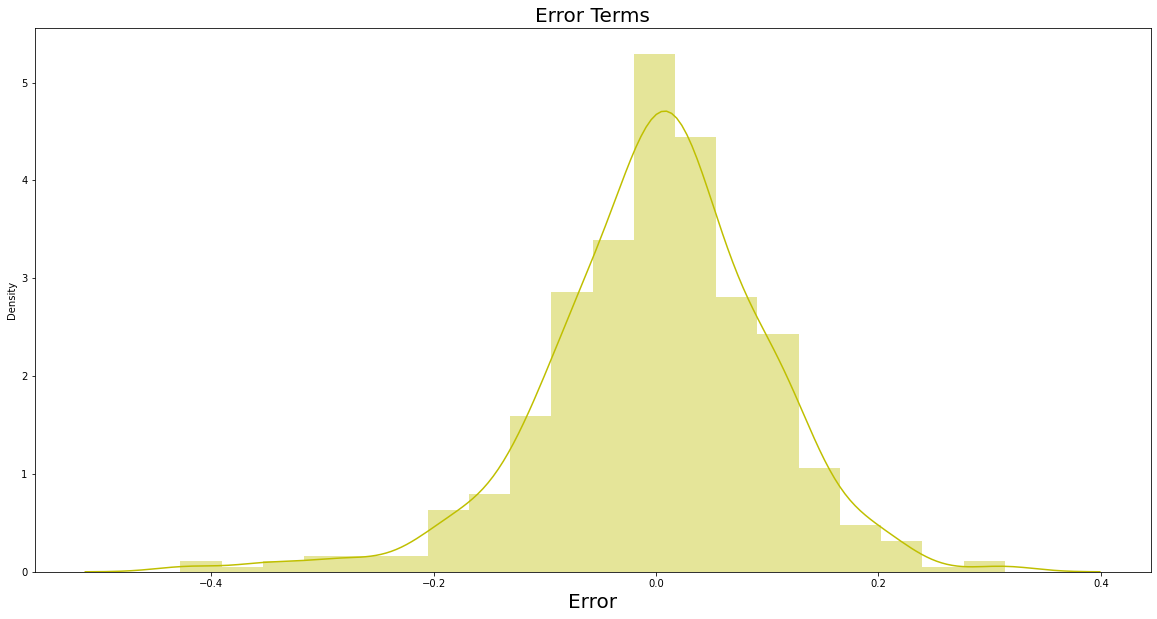

In [70]:
# create 'histogram' for the error terms:

fig = plt.figure()

plt.figure(figsize=(20,10))
sns.distplot((y_train - y_train_predict), bins = 20, color='y')

plt.title('Error Terms', fontsize = 20)
plt.xlabel('Error', fontsize=20)
plt.show()

## Step-7: Making Predictions

### Apply the scaling on the test sets:

In [71]:
# create a list of numerical variables:
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [72]:
# Dividing into X_test and y_test:
X_test = bike_test
y_test = bike_test.pop('count')
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,...,light_snow,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.027273,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.163248,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


### Check Columns:

X_train_new4.columns

In [73]:
# use model to make predictions:

# create X_test_new DataFrame by dropping variables from X_test:
X_test_new = X_test[X_train_new4.columns]

# Add constant variable:
X_test_new1 = sm.add_constant(X_test_new)
                              
X_test_new1.head()

,const,Feb,Sep,Saturday,Sunday,Mist + Cloudy,light_snow,winter,Year,workingday,temp
184,1.0,0,0,0,0,1,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,0,1,1,0.901354
299,1.0,0,0,0,0,1,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,0,0,0,1,0.817246


In [74]:
# making predictions:
y_pred = lm4.predict(X_test_new1)

### Finding R-Squared and Adjusted R-Squared for Test set:

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7817678172716522

### Formula of adjusted R^2:

### Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

In [76]:
# here, n=sample size, p=number of independent variables:

adj_r2 = 1-(1-0.7817678172716522)*(11-1)/(11-1-1)
print(adj_r2)

0.7575197969685025


# Step-8: Model Evaluation

Text(0, 0.5, 'y_pred')

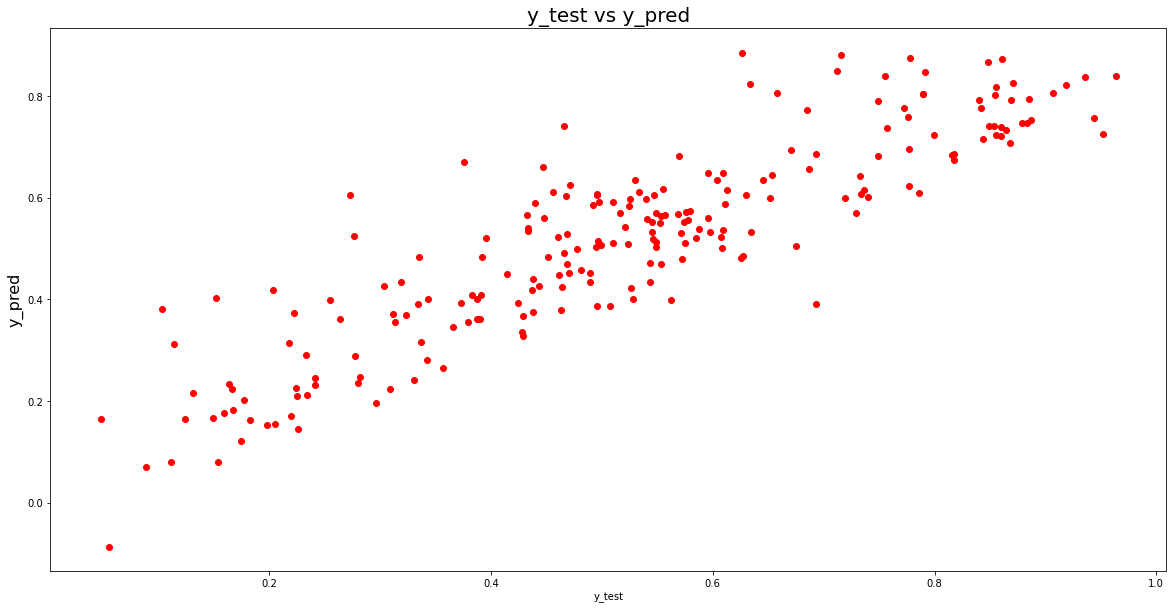

In [77]:
# create a 'scatter plot' to understand the spread.
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color = 'red')
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=16)

### Visualising the fit on the test set:

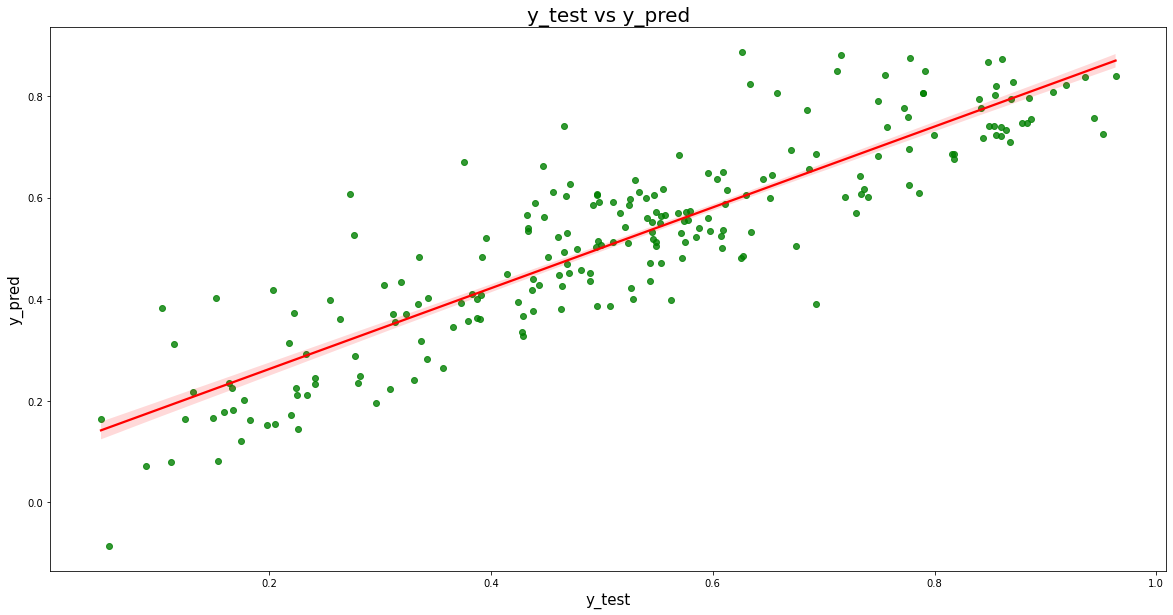

In [78]:
# Linear Regression plot:
plt.figure(figsize=(20,10))
sns.regplot(x = y_test, y = y_pred, ci=68, fit_reg=True, scatter_kws={'color':'green'}, line_kws={'color':'red'})

plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)
plt.show()

### Analysis Comparison between Train model and Test Model:

### Insights:

1.Train: R^2 = 0.805 and adj R^2 = 0.801.

2.Test: R^2 = 0.7817 and adj R^2 = 0.757.

3.Difference in R^2 between train and test:1.5%

4.Difference in adjusted R^2 between train and test:3.15%

if R^2 is less than 5%, we can conclude that it is the best model.

### Diving into Final Analysis:

here, temperature variable is having the highest coefficient that is 0.3680, which means if the temperature increases by one unit the number of bike rentals increases by 0.3680.

there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

Mist + Cloudy: -0.0799, light_snow: -0.3135,spring: -0.1462 has a negative coefficient, which suggest as the independent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

## Business Gaols:

### Conclusions:

Temperature colud be a prime factor for making decision for the Organisation.

Demand of bikes was higher in 2019 in the comparistion of 2018.

Demands are high during Working Days, so, provide a graet offers to the working individuals.